(-1.3038115874221274, 0.6274267086030326, 13, 154, {'1%': -3.473542528196209, '5%': -2.880497674144038, '10%': -2.576878053634677}, 1115.1730447395112)


4166.326661899466

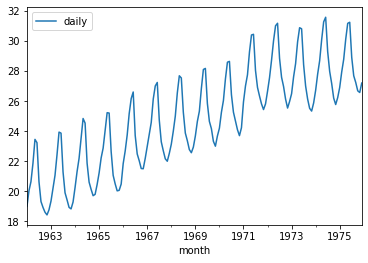

In [25]:
# ЭТО ПЕРВЫЙ ТЕСТ (ТРЕНИРОВОЧНЫЙ)
import numpy as np

milk = pd.read_csv('monthly-milk-production.csv',';', parse_dates=['month'], dayfirst=True)

import calendar
import statsmodels.api as sm
print(sm.tsa.stattools.adfuller(milk['milk'].values))

milk['daily'] = milk['milk'] / [calendar.monthrange(x.year, x.month)[1] for x in milk['month']]

milk.plot(x='month', y='daily', kind='line')

np.sum(milk['daily'])
                           
#milk.plot(x='month', y='daily', kind='line')                           

In [40]:
#ЭТО ВТОРОЙ ТЕСТ (9 вопросов)
import pandas as pd
import calendar
import math

df = pd.read_csv('monthly-milk-production.csv',';', parse_dates=['month'], dayfirst=True)

df['daily'] = df['milk'] / [calendar.monthrange(x.year, x.month)[1] for x in df['month']]

def diff(_list, d):
    result = []
    for i in range(d, len(_list)):
        if (not math.isnan(_list[i])):
            result.append(_list[i] - _list[i-d])
    return result

def diki_fuller(seq):
    seq = seq[np.isfinite(seq)]
    return sm.tsa.stattools.adfuller(seq)[1]

df0 = diki_fuller(df['daily'])
daily_diff1 = (df['daily'] - df['daily'].shift(1)).values
df1 = diki_fuller(daily_diff1)
daily_diff2 = df['daily'] - df['daily'].shift(12)
df2 = diki_fuller(daily_diff2)
daily_diff12 = daily_diff1 - df['daily'].shift(12)
df12 = diki_fuller(daily_diff12.values)



df0, df1, df2, df12



(0.6822151513081454,
 0.06430054654175274,
 0.22127672658830344,
 0.604819808730786)

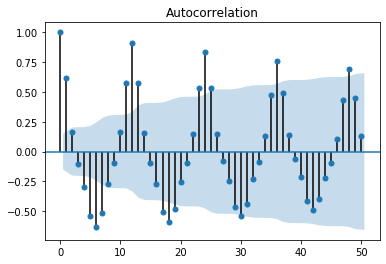

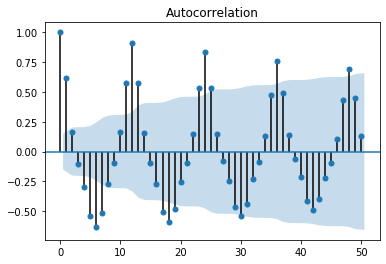

In [43]:
series = daily_diff1[np.isfinite(daily_diff1)]

import statsmodels.api as sm
sm.graphics.tsa.plot_acf(series.squeeze(), lags=50)

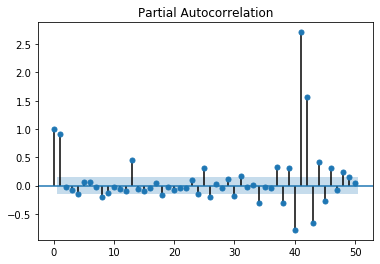

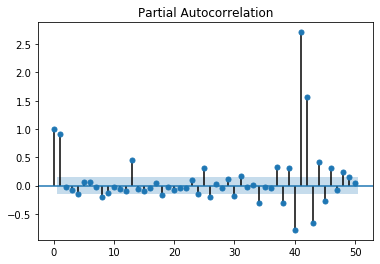

In [58]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(series.squeeze(), lags=50)